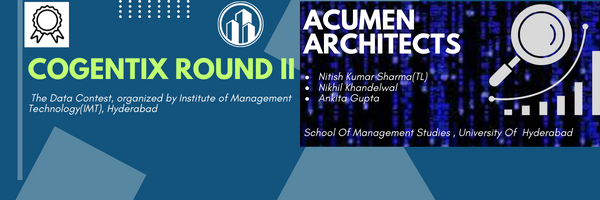

# COGENTIX ROUND II

> This Code file is part of the deliverables as submission to ROUND II of **'Cogentix'**, The Data Contest, organized by Institute of Management Technology(IMT), Hyderabad.

> This solely represents the work of team ***ACUMEN ARCHITECTS*** having team members as
- Nitish Kumar Sharma(TL)
- Nikhil Khandelwal
- Ankita Gupta





## Structure of work
> I. **Case Study Understanding**
- Problem Statement
- Objective

> II. **Data Exploration**
- Dataset
- Data consistency
- Data quality

> III. **Data Preparation**
- Categorization of data
- Categorical Data encoding

> IV. **Exploratory Data Analysis**:
- plots
- Statistics of numerical data
- Correlations

> V. **Data Modeling**
- Classification models

> VI. **Model Evaluation & Comparison**
- Model performance
- Comparison plots

> VII. **Conclusion**
- Final Model preparation
- Deployment

# **I. Case Study Understanding**

### **Problem Statement**

**Hypothetical**: ABC, a talent acquisition company, provides support to various information technology (IT) companies in India. They are confronted with a significant challenge where approximately 30% of candidates who accept job offers ultimately do not join the hiring companies. This attrition leads to substantial financial losses and inefficiencies, as the recruitment process must be restarted to meet the workforce demand.

To address this issue, ABC aims to develop a predictive model that can assess the likelihood of a candidate accepting a job offer and, importantly, include a classification column that indicates whether the candidate eventually joined the hiring company or not

### **Objective**

The primary objective of this project is to develop a classification model that can accurately predict the probability of a candidate accepting a job offer and whether the candidate will follow through and join the company. Specifically, ABC aims to achieve the following objectives:

**A. Build a predictive model**: Create a machine learning classification model that takes into account various candidate-related features, such as qualifications, experience, interview performance, and other relevant factors, to predict the likelihood of a candidate accepting a job offer.

**B. Identify non-joiners:** Develop a component of the model that can flag candidates who are likely to accept the job offer initially but are at a high risk of not joining the company, thus potentially avoiding unnecessary recruitment costs and delays.

**C. Improve decision-making:** Provide actionable insights to ABC and their client companies for making informed decisions regarding candidate selection and job offer management.


By addressing these objectives, ABC intends to optimize the recruitment process, reduce financial losses, and ensure a more efficient utilization of time and resources in the talent acquisition pipeline.

# **II. Data Exploration**

### **DataSet Description:**

**Candidate:** Reference number; it is a unique to identify the candidate.

**DOJextended :** Binary variable identifying candidate asked for date of joining extension (yes/no).

**Duration to accept the offer:** Number of days taken by the candidate to accept the offer (Scale variable).

**Notice Period:** Notice period to be served in the parting company before candidate can join this company.

**Offered band:** Band offered to the candidate based on experience, performance in the interview rounds (E0/E1/E2/E3).

**Percentage hike expected:** Percentage hike expected by the candidate (Scale variable).

**Percentage hike offered:** Percentage hike offered by the company (Scale variable).

**Joining bonus:** Binary variable indicating if joining bonus was given or not (yes/no).

**Gender:** Gender of the candidate (male/female).

**Candidate source:** Source form which resume of the candidates was obtained (Employee referral/Agency/Direct).

**REX (in yrs):** Relevant years of experience of the candidate for the position offered.

**LOB:** Line of business for which offer was rolled out.

**Age:** Age of the candidate.

**Joining location:** Company location for which the offer was rolled out for the candidate to join.

**Candidate relocation status:** Binary Variable indicating whether the candidate has to relocate from one city to another city for joining (yes/no).

**HR Status:** Final joining status of the candidate (joined/ no joined).

### **Insight of Data:**

**Number of attributes:** 18

**Target attribute:** Status

**Any missing values:** None

**Import the Important libaries.**

In [ ]:
#Basic Libaries
from __future__ import division
import pandas as pd
import numpy as np

#visualization Library
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Date Time Library
import datetime, nltk, warnings
import matplotlib.cm as cm

# Tools and Techniques
import itertools
from pathlib import Path

# machine learning , statistical modeling and  Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS

#Model Selection Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML

#Metrices Library
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

In [ ]:
#Defining a color palette for use in visualizations
color = ["green", "Blue", "Red", "Yellow", "Brown", "Grey",'Maroon','black','Pink']
sns.set_palette(color)

In [ ]:
df_initial = pd.read_csv('/content/DATASET.csv')

In [ ]:
# show first lines
display(df_initial[:5])

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,1
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,1
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,1
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,1
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,1


In [ ]:
df = pd.DataFrame(df_initial)

# Generate unique Candidate_Id values
df['Candidate_Id'] = range(1, len(df) + 1)

# Reorder the columns to place 'Candidate_Id' in the first position
column_order = ['Candidate_Id'] + [col for col in df.columns if col != 'Candidate_Id']
df = df[column_order]

# modified DataFrame
df.head()


,Candidate_Id,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,1
1,2,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,1
2,3,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,1
3,4,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,1
4,5,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,1


In [ ]:
# gives some infomation on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

# Create a dataframe with the number of null values
null_values = pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'null values (nb)'})
tab_info = pd.concat([tab_info, null_values], axis=0)

# Create a dataframe with the percentage of null values
null_percent = pd.DataFrame(df.isnull().sum() / df.shape[0] * 100).T.rename(index={0: 'null values (%)'})
tab_info = pd.concat([tab_info, null_percent], axis=0)

print ('-' * 10 + " Display information about column types and number of null values " + '-' * 10 )

display(tab_info)
print("**********************************************************")

print('Total number of rows:', len(df.axes[0]))
print('Total number of columns:', len(df.axes[1]))

num_col = [col for col in df.columns if df[col].dtypes in ['int64','float64']]
cat_col = [col for col in df.columns if df[col].dtypes == 'object']

print("**********************************************************")

print("Numerical columns are: \n",num_col)
print('Categorical columns are: \n',cat_col)
print("**********************************************************")

dis_col = []
cont_col = []

#keeping cardinality 10 seperate the discrete and continuos variables

for col in num_col:
    if col == 'Candidate_Id':
        pass
    elif df_initial[col].nunique() < 10:
        dis_col.append(col)
    else:
        cont_col.append(col)

print('Discrete columns are:',dis_col)
print('Continuous columns are:',cont_col)


---------- Display information about column types and number of null values ----------


,Candidate_Id,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
column type,int64,object,int64,int64,object,float64,float64,float64,object,object,object,object,int64,object,object,int64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**********************************************************
Total number of rows: 8995
Total number of columns: 17
**********************************************************
Numerical columns are: 
 ['Candidate_Id', 'Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age', 'Status']
Categorical columns are: 
 ['DOJ Extended', 'Offered band', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 'Location']
**********************************************************
Discrete columns are: ['Notice period', 'Status']
Continuous columns are: ['Duration to accept offer', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']


In [ ]:
#numerical columns
num_col = ['Candidate_Id', 'Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']

#Catgorical varibles
cat_col = ['DOJ Extended','Offered band', 'Joining Bonus', 'Candidate relocate actual',
       'Gender','Candidate Source', 'LOB', 'Location', 'Status']

In [ ]:
df[num_col].describe()

,Candidate_Id,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,4498.000000,21.434464,39.291829,43.864804,40.657356,-1.573802,4.239022,29.913174
std,2596.777169,25.811616,22.220239,29.788975,36.064060,19.610729,2.547571,4.097912
min,1.000000,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,2249.500000,3.000000,30.000000,27.270000,22.090000,-8.330000,3.000000,27.000000
50%,4498.000000,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000
75%,6746.500000,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,8995.000000,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000


# **III. Data Preparation**

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Candidate_Id is 8995 .
No. of unique values in  DOJ Extended is 2 .
No. of unique values in  Duration to accept offer is 136 .
No. of unique values in  Notice period is 7 .
No. of unique values in  Offered band is 4 .
No. of unique values in  Pecent hike expected in CTC is 2082 .
No. of unique values in  Percent hike offered in CTC is 2601 .
No. of unique values in  Percent difference CTC is 1148 .
No. of unique values in  Joining Bonus is 2 .
No. of unique values in  Candidate relocate actual is 2 .
No. of unique values in  Gender is 2 .
No. of unique values in  Candidate Source is 3 .
No. of unique values in  Rex in Yrs is 22 .
No. of unique values in  LOB is 9 .
No. of unique values in  Location is 11 .
No. of unique values in  Age is 33 .
No. of unique values in  Status is 2 .


In [ ]:
print('Duplicate data entries: {}'.format(df.duplicated().sum()))
#df.drop_duplicates(inplace = True)

Duplicate data entries: 0


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df.head()

,Candidate_Id,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,1
1,2,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,1
2,3,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,1
3,4,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,1
4,5,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,1


In [ ]:
# Convert categorical variables to numerical using Label Encoding
for col in cat_col:
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
df.head()

,Candidate_Id,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34,1
1,2,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34,1
2,3,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27,1
3,4,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34,1
4,5,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34,1


# **IV. Exploratory Data Analysis:**

<ipython-input-12-f1a127864b38>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
<ipython-input-12-f1a127864b38>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask[np.triu_indices_from(df.corr())] = True
<ipython-input-12-f1a127864b38>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Set2',annot=True,mask=mask,ax=ax)


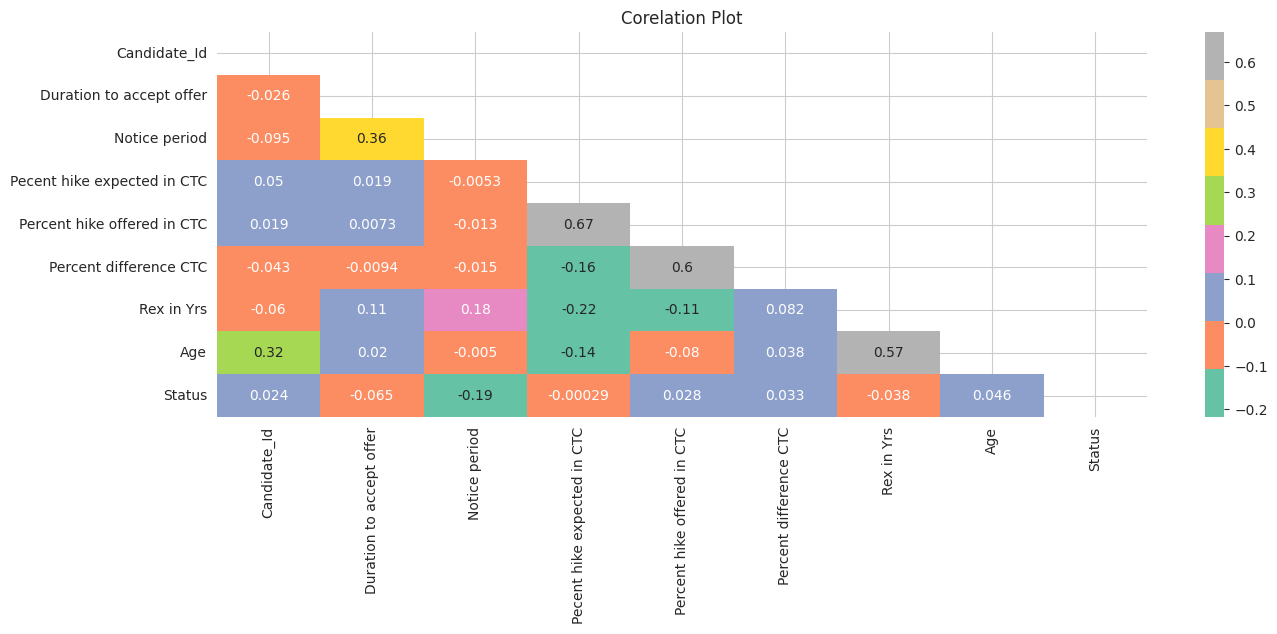

In [ ]:
#Corelationship plot
fig,ax=plt.subplots(figsize=(15,5))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(df.corr())] = True
sns.heatmap(df.corr(),cmap='Set2',annot=True,mask=mask,ax=ax)
plt.title('Corelation Plot')
plt.show()

#### Inference from Correlation Heatmap:
- Duration to accept offer has a moderate positive correlation with Notice period, indicating that longer notice periods are associated with longer times to accept offers.

- Pecent hike expected in CTC and Percent hike offered in CTC have a strong positive correlation, suggesting that expected and offered salary hikes move together closely.

- Age and Rex in Yrs have a strong positive correlation, suggesting that older candidates tend to have more years of experience.

- Status doesn't show strong correlations with other variables.


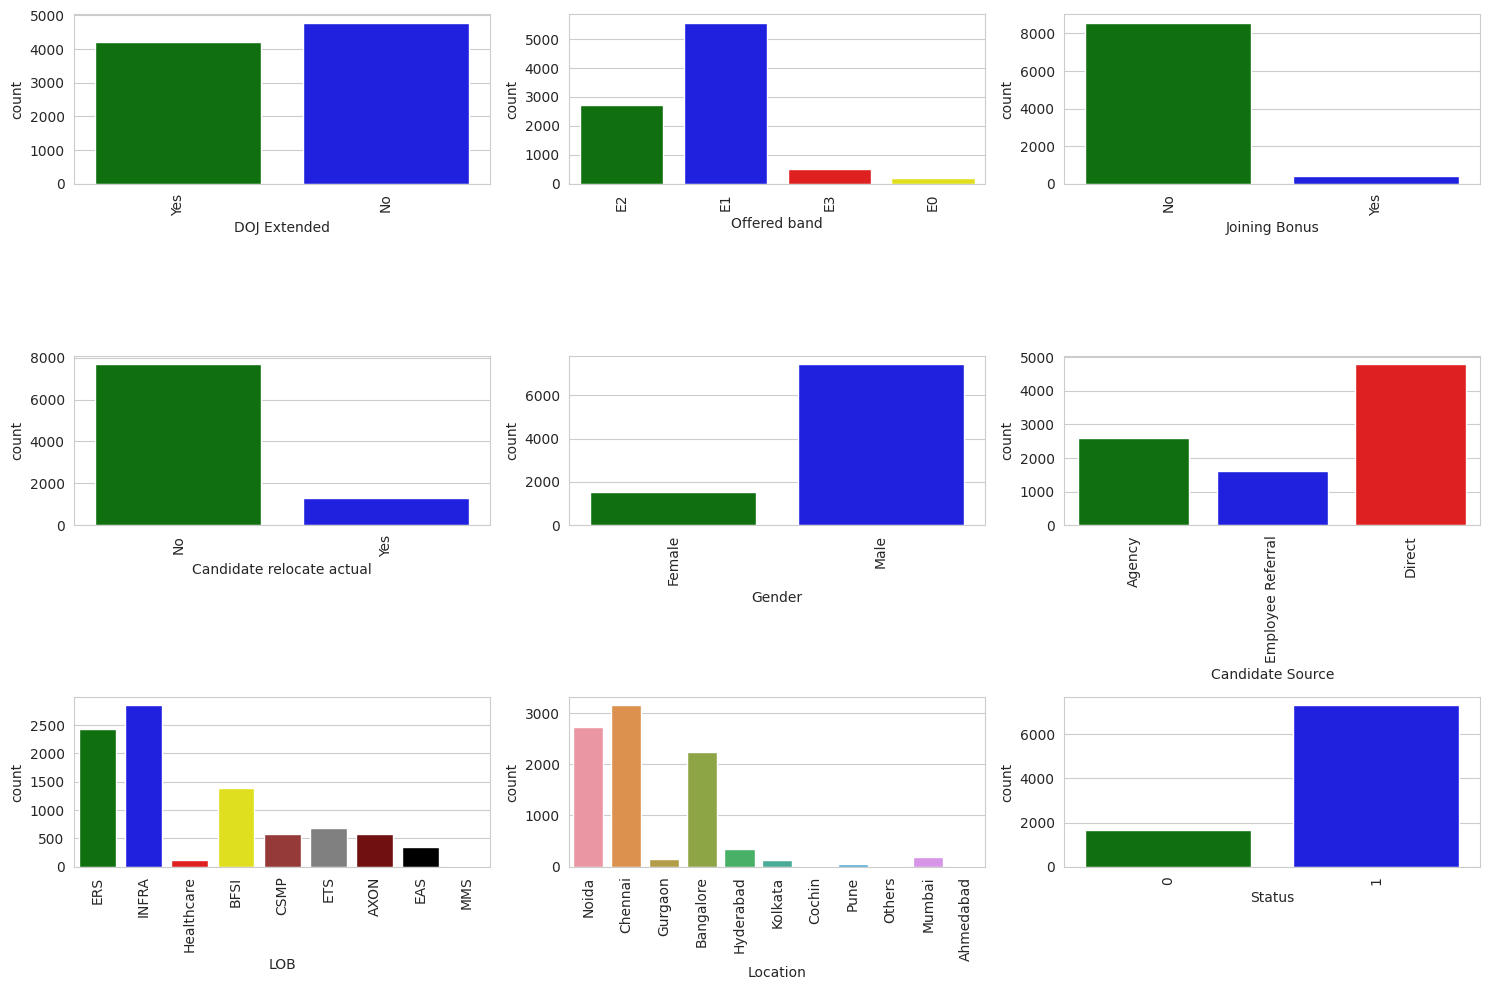

In [ ]:
# Count plot for the categorical variables with 3 plots in a row

fig, axes = plt.subplots(int(np.ceil(len(cat_col) / 3)), 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for category, ax in zip(cat_col, axes.flatten()):
    sns.countplot(x=category, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Observation from the above plots
1. Most of the candidates **didn't asked** for date of joining extension (DOJ).
2. Band offered to the candidate based on experience, performance in the interview rounds which is **E1** in most in number.
3. Most of the candidates **has not received** any joining bonus.
4. Most of the candidates **has not relocated** to any new city.
5. Most of the candidates are **Males**.
6. Most of the resumes obtained are **direct** and followed by the **Agency**.
7. Line of business(LOB) for which offer was give is more for **INFRA** and followed by **ERS,BFSI** and others.
8. **Chennai** is the place where most of the candidates got placed later by **Noida & Bangalore**.
9. Most candidates did **Joined** the offered job.

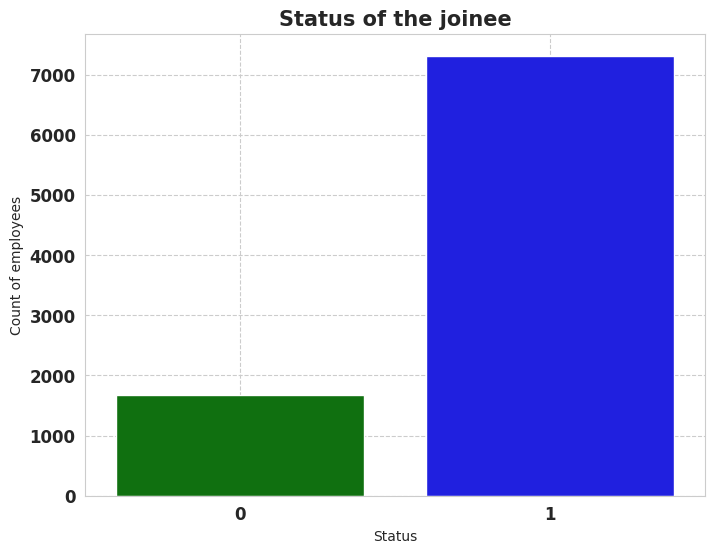

In [ ]:
sts = df['Status'].value_counts().reset_index()

# plot the status of joinee
plt.figure(figsize=(8,6))
sns.barplot(x=sts['index'], y=sts.Status)
plt.grid(visible=True, linestyle='--')
plt.title('Status of the joinee', weight = 'bold', size = 15)
plt.xticks(size = 12, weight = 'bold')
plt.xlabel("Status")
plt.ylabel("Count of employees")
plt.yticks(size = 12, weight = 'bold')
plt.show()

#### Observations

**Classes are imbalanced as we can see in the plot**

**We will solve this problem using logistics regression as a base line and 7 other models using SMOTEENN resampler and gridserachCV.**

**Distribution plots below**


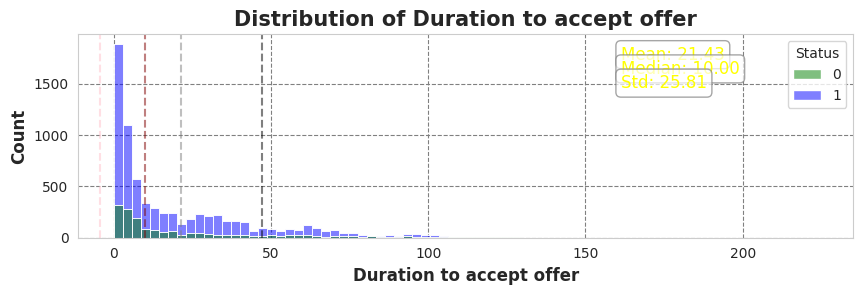

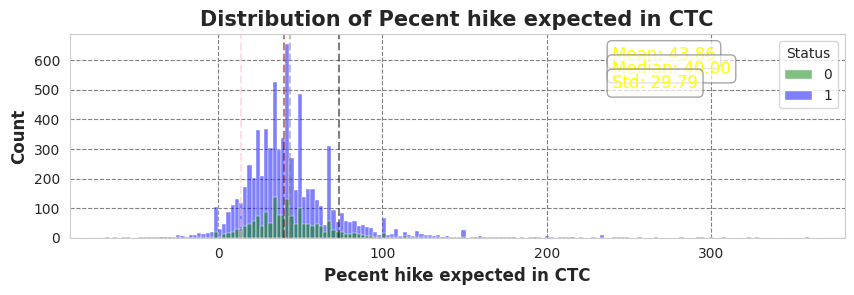

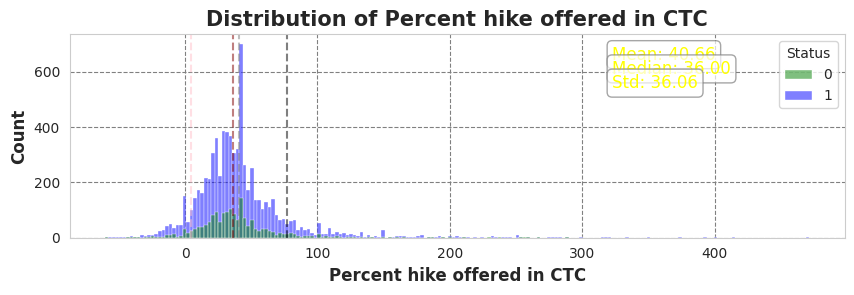

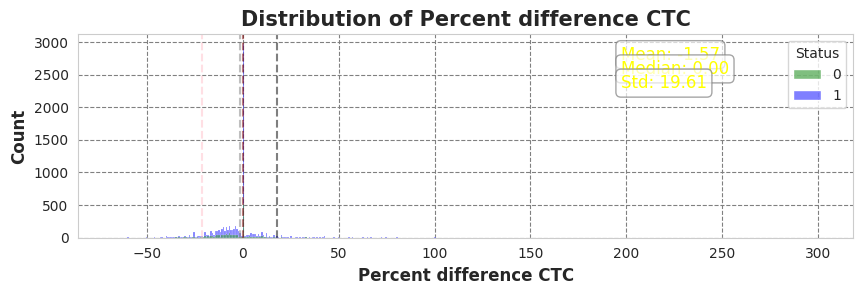

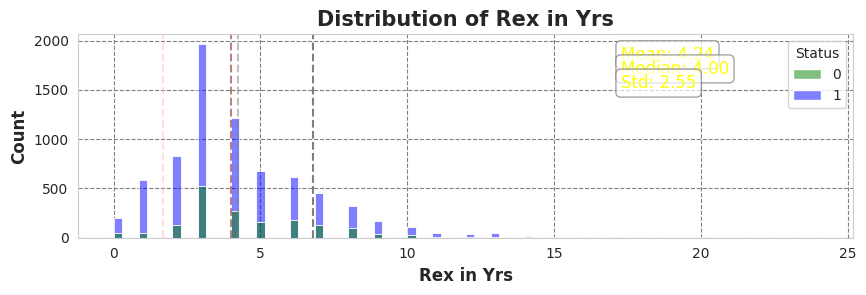

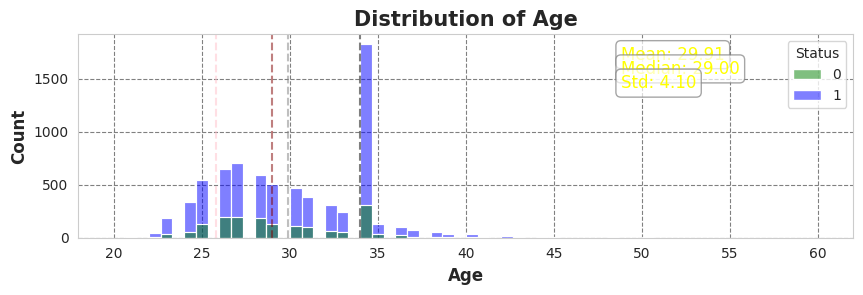

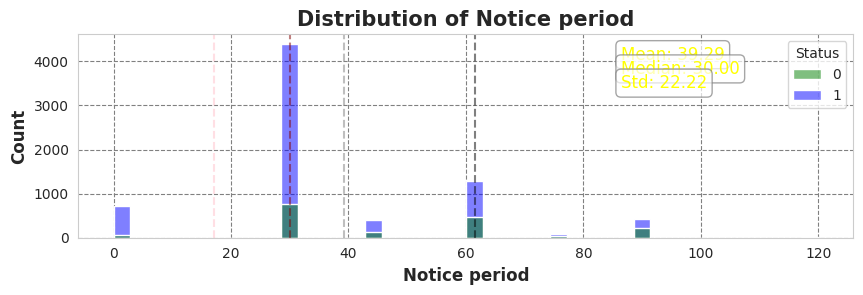

In [ ]:
cont_col.append('Notice period')

# Create a list of statistics to display in the plot
statistics_to_display = ['Mean', 'Median', 'Std']

for i, col in enumerate(cont_col):
    plt.figure(figsize=(10, 28))
    plt.subplot(9, 1, i + 1)  # Use 9 rows to accommodate all 9 plots

    # Create a histogram with hue based on 'Status'
    sns.histplot(data=df, x=col, hue='Status', color=color[2])

    # Calculate statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()

    # Add vertical lines and annotations for statistics
    plt.axvline(x=mean_val, linestyle='--', alpha=0.5, color=color[5])
    plt.axvline(x=median_val, linestyle='--', alpha=0.5, color=color[6])
    plt.axvline(x=mean_val + std_val, linestyle='--', alpha=0.5, color=color[7])
    plt.axvline(x=mean_val - std_val, linestyle='--', alpha=0.5, color=color[8])

    # Set plot title and labels
    plt.title(f'Distribution of {col}', weight='bold', size=15)
    plt.xlabel(col, size=12, weight='bold')
    plt.ylabel('Count', size=12, weight='bold')

    # Add text annotations for statistics
    annotations = [
        f'Mean: {mean_val:.2f}',
        f'Median: {median_val:.2f}',
        f'Std: {std_val:.2f}',
    ]
    for j, annotation in enumerate(annotations):
        plt.text(
            0.7, 0.9 - j * 0.07,  # Adjust text position
            annotation,
            transform=plt.gca().transAxes,
            size=12,
            va='center',
            color=color[3],
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7),
        )

    # Customize the grid and appearance
    plt.grid(visible=True, linestyle='--', color=color[5])

plt.show()


#### Observations

**There is no significant features are seen from above plots. none of the features explicitly explaines target variable.**

**Average percent hike offered is lower than the expected by the candidate.**

**Average age is about 29.9 years with majority numbers of candidates from 30+ years age group.**

**On An avearge candidates take 21 days to accept the offer by the company.**

**Majority of the candidates are having low relevant years of experience in their respective line of business with average of 4.24 years.**

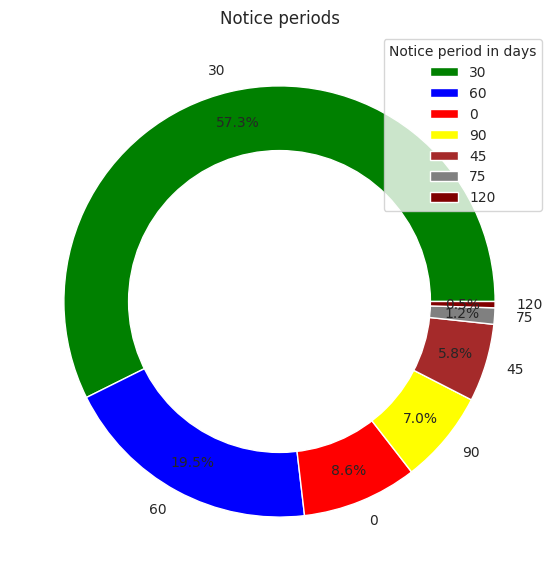

In [ ]:
donutdf = pd.DataFrame(df['Notice period'].value_counts())

# plot donut chart of Notice period
notice = donutdf.index
numbers = donutdf.values.ravel()
colors = color
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
#plot the pie
fig=plt.figure(figsize=(7,7))
fig=plt.pie(numbers,
        colors=colors,
        labels=notice,
        autopct='%1.1f%%',
        pctdistance=0.85,
        )
centre_circle = plt.Circle((0,0), 0.7, fc='White')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Notice periods")
plt.legend(title="Notice period in days")
plt.show()

In [ ]:
nt_df= df.pivot_table(index='Notice period',
              columns='Status',
              values='Candidate_Id',
              aggfunc="count")
nt_df['ratio_by_joining'] = nt_df[1]/nt_df[0]
nt_df['Joining percent'] = nt_df[1]/(nt_df[1]+nt_df[0])*100
nt_df

Status,0,1,ratio_by_joining,Joining percent
Notice period,,,,
0,51,726,14.235294,93.436293
30,765,4393,5.742484,85.168670
45,129,397,3.077519,75.475285
60,470,1285,2.734043,73.219373
75,35,75,2.142857,68.181818
90,212,415,1.957547,66.188198
120,20,22,1.100000,52.380952


#### Observations

**We can learn that 30 days notice period is the most common among employers**

**As we can learn from above table as notice period increasing percent of people joining to comapny is decreasing which is significant trend to notice.**

**We learned this from feature importance of tree based model RANDOM FOREST, so here we are able to answer to out HR that Notice period is factor that likely affacts the candidiates joining status.**

**More the time for notice period, lesser the likelihood of candidate to join the company.**

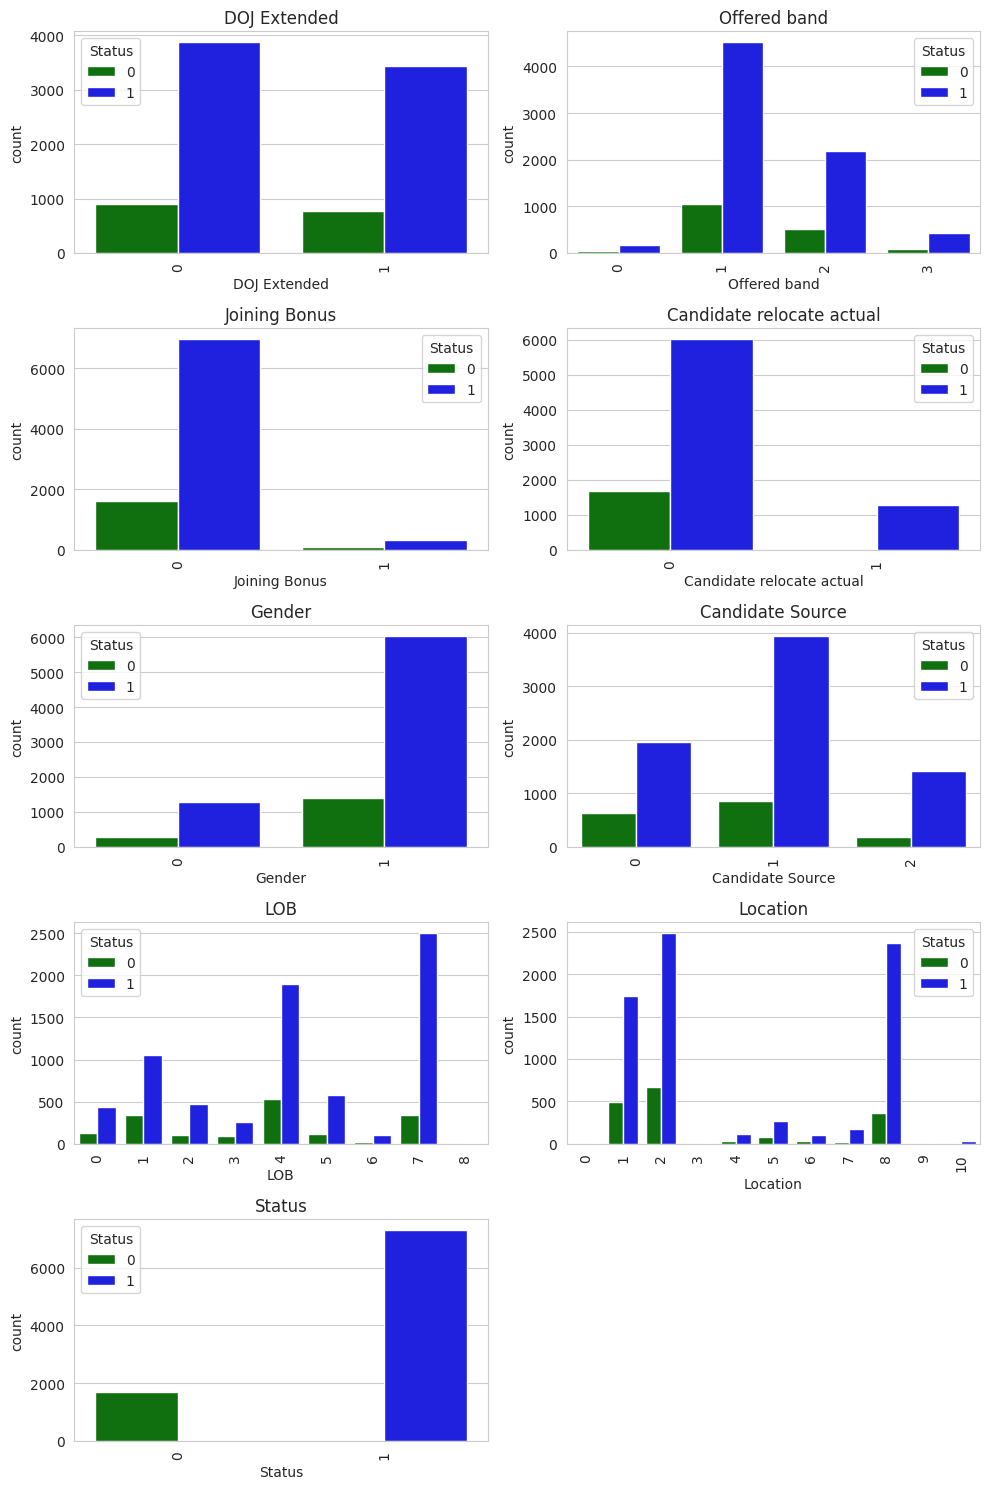

In [ ]:
# Determine the number of rows and columns for subplots
num_rows = int(np.ceil(len(cat_col) / 2))
num_cols = 2

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array so we can iterate over them
axes = axes.flatten()

# Iterate over categorical variables and plot them
for i, col in enumerate(cat_col):
    ax = axes[i]
    sns.countplot(x=col, data=df, hue='Status', ax=ax)
    ax.set_title(col)  # Set the title as the variable name
    ax.tick_params(axis='x', rotation=90)

# Hide any remaining empty subplots
for i in range(len(cat_col), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Observations

**We have most numbers of candidates from chennai city of india and also more joinees are from chennai, vice versa.**

**Majority of cadidates are sourced directly by the company.**

**Majority of the candidates are Male.**

**E1 offer band is the most common among the employers.**

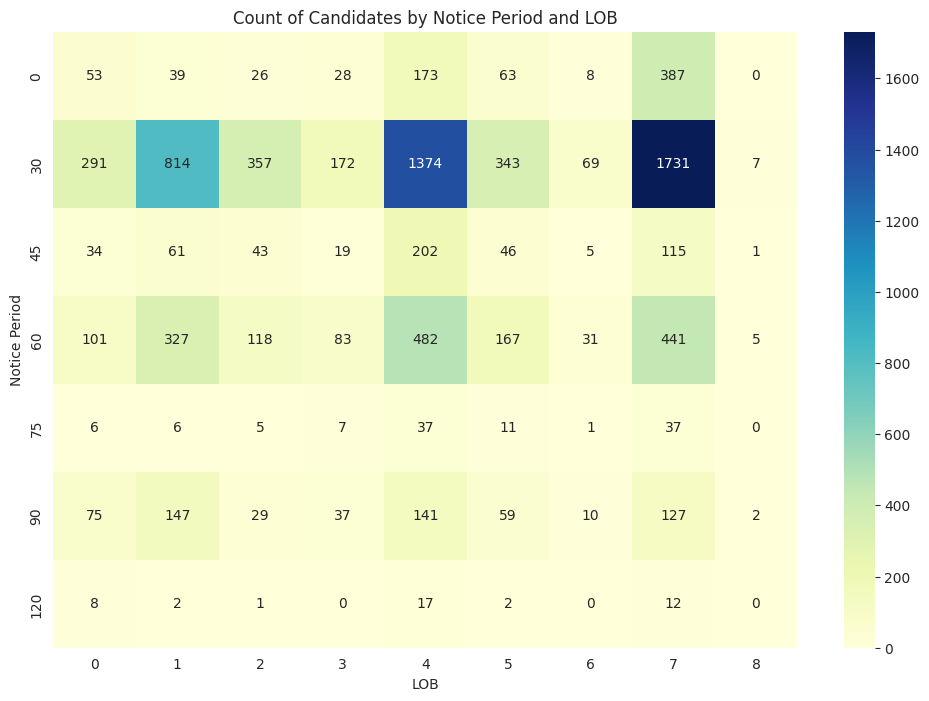

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

nlobdf= pd.DataFrame(df.groupby(['Notice period','LOB'])['Candidate_Id'].count())


# Convert the grouped data into a pivot table
nlob_pivot = nlobdf.pivot_table(values='Candidate_Id', index='Notice period', columns='LOB', fill_value=0)



plt.figure(figsize=(12, 8))
sns.heatmap(nlob_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Count of Candidates by Notice Period and LOB')
plt.xlabel('LOB')
plt.ylabel('Notice Period')
plt.show()


**Observation**

The heatmap provides a clear visual representation of the distribution of candidates across different notice periods and LOBs.

**The color intensity in the heatmap indicates the number of candidates, with the highest count being 1731 in a specific combination of notice period and LOB.**

The x-axis represents the LOB categories, showing how many candidates belong to each category.

The y-axis represents the notice periods, indicating the duration candidates need to serve before joining.

This visualization can help in identifying patterns or trends in candidate counts across different notice periods and LOBs, which could be valuable for HR and recruitment analysis.

In [ ]:
pivot_table= df.pivot_table(values='Percent difference CTC',
              index='Location',
              columns='Status',
              aggfunc=[np.mean, np.median, np.max, np.min])

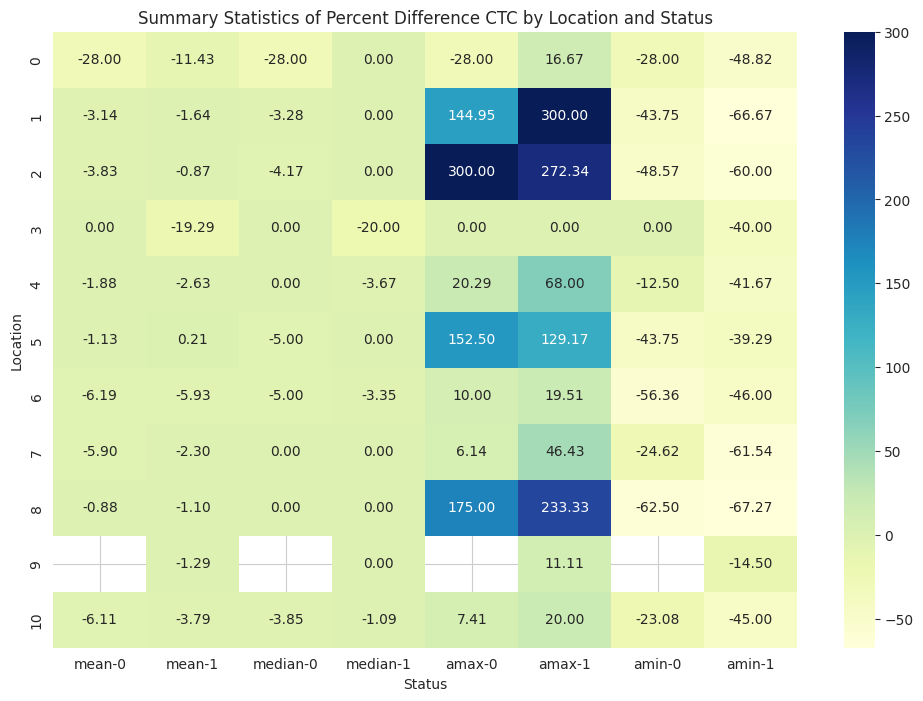

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pivot table is stored in 'pivot_table'
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Summary Statistics of Percent Difference CTC by Location and Status')
plt.xlabel('Status')
plt.ylabel('Location')
plt.show()


#### Observations

The heatmap offers a visual representation of how the CTC percent difference varies across different locations and candidate statuses.


**The color intensity in the heatmap provides insight into the magnitude of CTC differences, with the highest difference reaching 300.**


The x-axis represents candidate statuses, distinguishing between candidates who joined and those who did not.


The y-axis represents different locations, allowing us to compare CTC differences for various city or region categories.


**The heatmap suggests that, on average, candidates are less likely to join the company when the offered CTC hike is lower than their expectations, as indicated by higher differences in those cases. This information can be valuable for understanding the impact of CTC differences on candidate decision-making.**

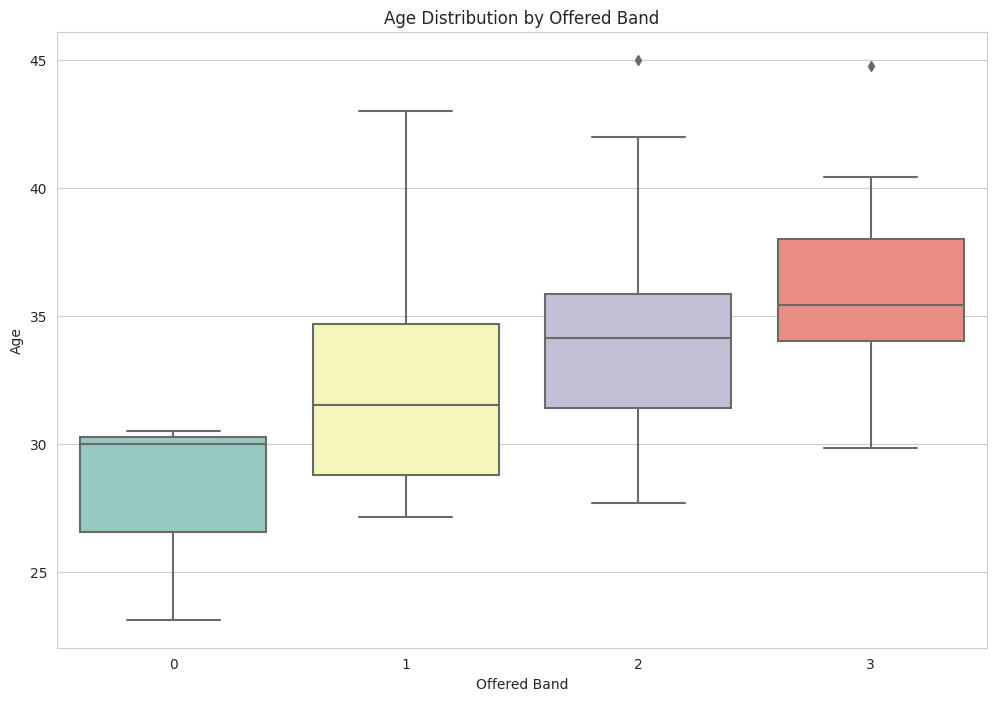

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

rex_offerdf = df.groupby(['Offered band','Rex in Yrs']).Age.mean().reset_index()

plt.figure(figsize=(12, 8))
sns.boxplot(data=rex_offerdf, x='Offered band', y='Age', palette='Set3')
plt.title('Age Distribution by Offered Band')
plt.xlabel('Offered Band')
plt.ylabel('Age')
plt.show()


#### Observations

**"Years of experience and age are directly proportional to offerband"** implies that candidates with more years of experience and older candidates tend to receive higher offerbands or salary packages, indicating that these factors have a positive correlation with the compensation level. This observation suggests that the company values experience and age as factors that contribute to a candidate's higher salary or offerband.

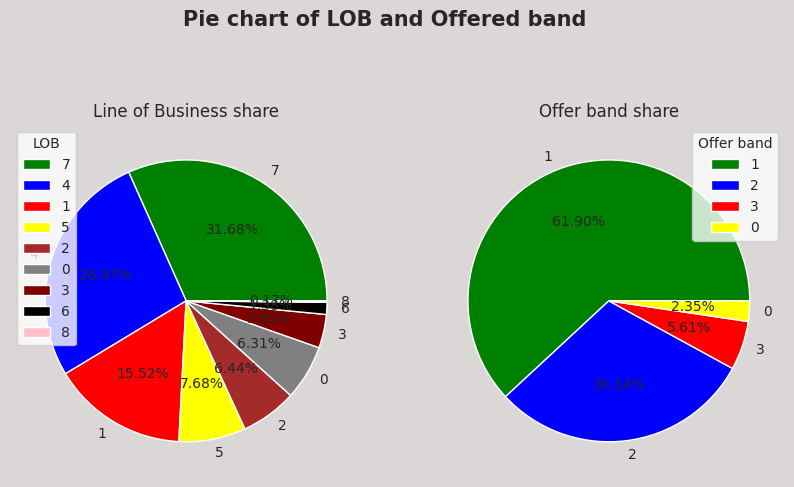

In [ ]:
lobdf = df['LOB'].value_counts()
offerdf = df['Offered band'].value_counts()

# plot the pie charts
plt.figure(figsize=(10,6), facecolor='#dbd7d7')

plt.subplot(1,2,1)
plt.pie(lobdf.values,
        colors=color,
        labels=lobdf.index,
       autopct='%1.2f%%')
plt.legend(title='LOB')
plt.title("Line of Business share")

plt.subplot(1,2,2)
plt.pie(offerdf.values,
       colors=color,
       labels=offerdf.index,
       autopct='%1.2f%%')
plt.legend(title='Offer band')
plt.title("Offer band share")

plt.suptitle("Pie chart of LOB and Offered band", weight='bold', size=15)
plt.show()

#### Observations

**From this charts we can learn that 31.68% candidates are from Infra LOB and 61.9% of candidates were offered E1 offer band**

# **V. Data Modeling**

In [ ]:
#Independented Varibales
X = df.iloc[:,:-1]
X.head()

,Candidate_Id,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age
0,1,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34
1,2,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34
2,3,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27
3,4,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34
4,5,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34


In [ ]:
#Dependented Varibales
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [ ]:
# Split the data into training and testing sets
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Encoding the categorical data
cat_features = [col for col in X_trn.columns if X_trn[col].dtypes == 'object']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
OH_train = pd.DataFrame(OH_encoder.fit_transform(X_trn[cat_features]))
OH_test = pd.DataFrame(OH_encoder.fit_transform(X_tst[cat_features]))

# put the index back
OH_train.index = X_trn.index
OH_test.index = X_tst.index

# drop object cols from X_trn and X_tst
num_trn = X_trn.drop(cat_features, axis=1)
num_tst = X_tst.drop(cat_features, axis=1)

# concat onhot and num data frame
OH_X_trn = pd.concat([num_trn, OH_train], axis=1)
OH_X_tst = pd.concat([num_tst, OH_test], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print("before resampling")
y_trn.value_counts()

before resampling


1    5854
0    1342
Name: Status, dtype: int64

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
# resample the datasets with over and under sampling
sm = SMOTEENN(enn = EditedNearestNeighbours(sampling_strategy='all', kind_sel="mode"),
             random_state=42)
X_retrn, y_retrn = sm.fit_resample(X = OH_X_trn, y= y_trn)

print("After resampling")
y_retrn.value_counts()

After resampling


0    5523
1    3897
Name: Status, dtype: int64

In [ ]:
X_retst, y_retst = sm.fit_resample(X = OH_X_tst, y= y_tst)
y_retst.value_counts()

0    1345
1     915
Name: Status, dtype: int64

In [ ]:
# scale the dataset with minmax scaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_retrn)
X_retrn = pd.DataFrame(scaler.fit_transform(X_retrn))
X_retst = pd.DataFrame(scaler.transform(X_retst))

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

# logistics regression model
LR = LogisticRegression(random_state = 42, solver='liblinear', max_iter = 1500)

# cross validation scoring
cv_score = cross_val_score(estimator=LR, X = X_retrn ,y= y_retrn, scoring='roc_auc',
                          cv=5, n_jobs=-1)

# print the mean CV score and std dev
print(np.mean(cv_score), np.std(cv_score))

0.8264661147136959 0.05247574371871013


In [ ]:
# fittting the model
LR.fit(X= X_retrn, y = y_retrn)

prediction = LR.predict(X = X_retst) # predictions on test data

print("Classification report of the logistics regression model: \n",
      classification_report(y_retst, prediction)) # print the classification report
print("======================================================")
print("Roc Auc score of the LR model: \n", roc_auc_score(y_retst, prediction)) # roc_auc
print("======================================================")
print("Accuracy score of the LR model: \n", accuracy_score(y_retst, prediction)) #accuracy

Classification report of the logistics regression model: 
               precision    recall  f1-score   support

           0       0.76      0.85      0.80      1345
           1       0.74      0.61      0.67       915

    accuracy                           0.75      2260
   macro avg       0.75      0.73      0.73      2260
weighted avg       0.75      0.75      0.75      2260

Roc Auc score of the LR model: 
 0.7294756942328398
Accuracy score of the LR model: 
 0.7526548672566372


#### Observations:

**With cross-validation we found our score was much better compared to regular fitted method**

**We got almost 70% ROC-AUC with 72% of accuracy score with our baseline logistic regression model**

In [ ]:
# confusion metrics and ROC CURVE plots
def plot_metrics(model, X:np.array, y_target:np.array) -> plt.figure:
    """
    Plot the confusion metrics and ROC-AUC curve for test dataset

    Arguments:
    predicted(model)
    X(array) : input test data
    y_target(array) : target_vector
    """
    prediction = model.predict(X)

    # compute the confusion matrix
    cm = confusion_matrix(y_target, prediction, labels=model.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels = model.classes_)

    fig, ax = plt.subplots(1,2, figsize=(10,5))
    fig.tight_layout(pad=3, h_pad=2, w_pad=4)
    fig.suptitle(type(model).__name__, weight=12)
    ax[0] = display.plot(ax= ax[0])

    # ROC CURVE
    y_pred_prob = model.predict_proba(X)[::,1]
    fpr, tpr, thresholds = roc_curve(y_target, y_pred_prob,
                                    drop_intermediate=False)
    auc = roc_auc_score(y_target, y_pred_prob)

    ax[1].plot(fpr, tpr, color=color[6],
              label= f'AUC = {auc:2.2f}')
    ax[1].plot([0,1], [0,1.01], 'r--', lw=1)
    ax[1].legend(loc='lower right', fontsize=10)
    ax[1].set_ylabel('True Positive Rate', fontsize=10)
    ax[1].set_xlabel('Flase Positve Rate', fontsize=10)
    ax[1].set_title("Receiver Operating Characteristic (ROC) curve", fontsize=10)

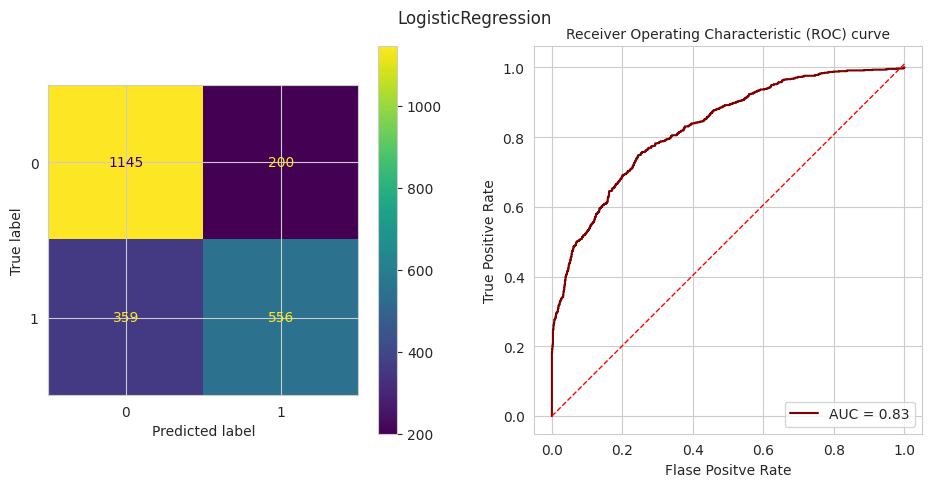

In [ ]:
plot_metrics(model=LR, X=X_retst, y_target=y_retst)

### Observation

The AUC score of the Logistic Regression (LR) model is 0.83, indicating its ability to discriminate between positive and negative classes.

The accuracy score of the LR model is 0.7527, suggesting that it correctly predicts the outcome for approximately 75% of the instances, which is a measure of overall model performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [ ]:
RF = RandomForestClassifier(max_depth=10,
                           n_estimators=150,
                           max_features= 'auto') # random forest object

RF.fit(X_retrn, y_retrn) # fit the model to data


prediction1 = RF.predict(X_retst) # predict on test data

print("Classification report of the Random forest model: \n",
      classification_report(y_retst, prediction1)) # print the classification report
print("======================================================")
print("Roc Auc score of the RF model: \n", roc_auc_score(y_retst, prediction1)) # roc_auc
print("======================================================")
print("Accuracy score of the RF model: \n", accuracy_score(y_retst, prediction1)) #accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Classification report of the Random forest model: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1345
           1       0.78      0.78      0.78       915

    accuracy                           0.82      2260
   macro avg       0.82      0.81      0.82      2260
weighted avg       0.82      0.82      0.82      2260

Roc Auc score of the RF model: 
 0.8147439413330083
Accuracy score of the RF model: 
 0.8221238938053097


In [ ]:
# Now let's do cross validation
# cross validation scoring
cv_score1 = cross_val_score(estimator=RF, X = X_retrn ,y= y_retrn, scoring='roc_auc',
                          cv=5, n_jobs=-1)

# print the mean CV score and std dev
print(np.mean(cv_score1), np.std(cv_score1))

0.9219761011479164 0.05055025419981258


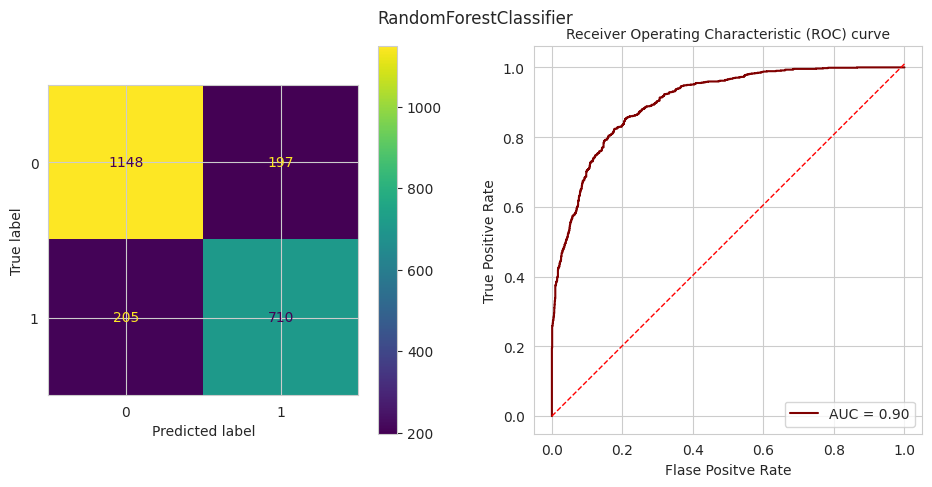

In [ ]:
plot_metrics(model=RF, X=X_retst, y_target=y_retst)

#### Observations:

A random forest model achieves an 82% accuracy, which suggests it is effective in making correct predictions. Additionally, having an AUC (Area Under the Curve) value of up to 90% with cross-validation implies that the model's ability to discriminate between positive and negative classes, such as in a binary classification problem, is very high, showcasing its strong predictive performance and reliability.

In [ ]:
# shap importance
!pip install shap
import shap
# progress bar
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.7 MB/s eta 0:00:00


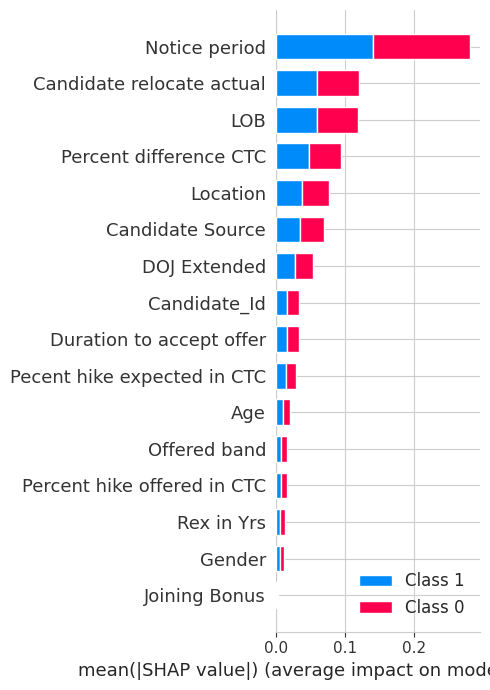

In [ ]:
# shap explaier of random forest model


explain = shap.TreeExplainer(RF)

shap_values = explain.shap_values(X_retst)
shap.summary_plot(shap_values, features = OH_X_trn,
                 plot_type='bar',
                 plot_size=(5,7))

###SHAP (SHapley Additive exPlanations) TreeExplainer to explain the predictions of a Random Forest (RF) model. SHAP provides insights into how individual features contribute to the model's predictions, helping to understand the importance of each feature in the RF model's decision-making process.

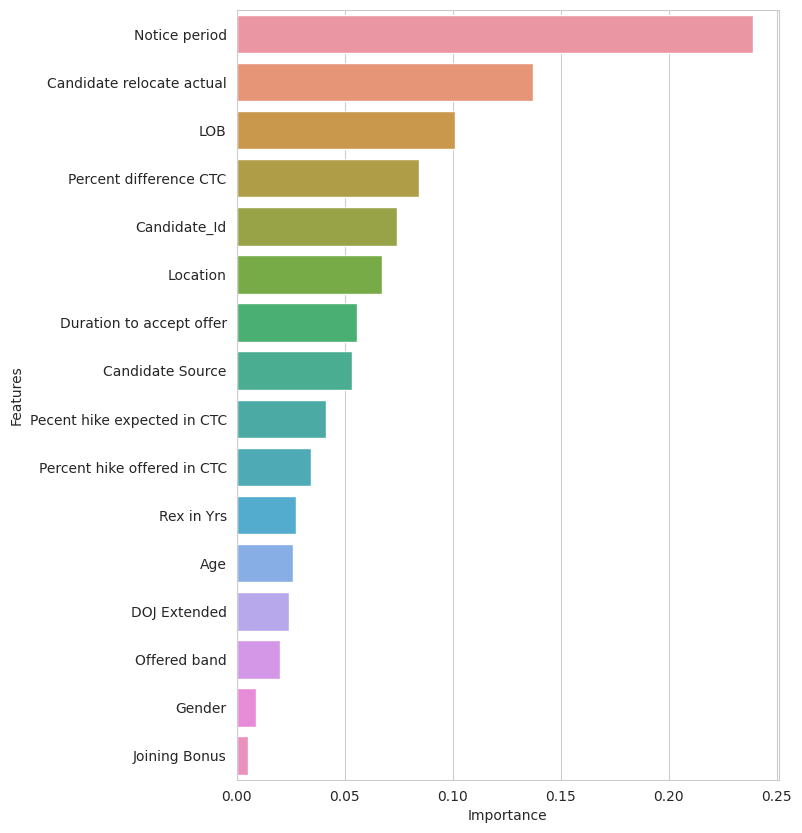

In [ ]:
# using feature imporatance methods
featre_rank = pd.DataFrame({"Features": OH_X_trn.columns,
                           "Importance": RF.feature_importances_}
                          )
featre_rank2 = featre_rank.sort_values('Importance', ascending=False)

# plot the feature imp by sklearn
plt.figure(figsize=(7,10))
sns.barplot(x='Importance',y='Features', orient='h', data=featre_rank2)
plt.show()

#### Observations

**We can learn that 'Notice period' and categorical feature of 5 and 15 are most important with both methods but their order is not the same.**

**Here, we can learn that these features are most predictor of whether or not candidate with join the company**

**Features of categories 5 and 15 are 'Joining bonus' and and 'LOB' respectivaly. so we can estimate that, both features contribute to the prediction of target variable.**

# **VI. Model Evaluation & Comparison**

# Pipeline of 8 models to find optimal classification accuracy

### RandomizedSearchCV

In [ ]:
# instances of each model
RF_clf = RandomForestClassifier(random_state=42)
AD_clf = AdaBoostClassifier(random_state=42)
LR_clf = LogisticRegression(random_state = 42, solver='liblinear', max_iter = 1500)
GB_clf = GradientBoostingClassifier(random_state=42)
ET_clf = ExtraTreesClassifier(random_state = 42)
DT_clf = DecisionTreeClassifier(random_state=42)
KN_clf = KNeighborsClassifier( )
SVC_clf = SVC(degree=10, probability = True, random_state = 42)
NB_clf = BernoulliNB()

In [ ]:
# pipeline of all the models with gridsearchCV & RandomSearchCV

#Random Forest 1
param_RF = {}
param_RF['classifier__n_estimators'] = [50,100,150,200,250]
param_RF['classifier__max_features'] = ['auto', 'sqrt', 'log2']
param_RF['classifier__max_depth'] = [5,8,10,14,20]
param_RF['classifier__class_weight'] = [None,{0:1,1:5},
                                       {0:1,1:10},{0:1,1:15}]
param_RF['classifier'] = [RF_clf]


# Adaboost 2
param_AD = {}
param_AD['classifier__n_estimators'] = [3,4,6,8,10,15,25,40]
param_AD['classfier__learning_rate'] = [(0.96 + x/100) for x in range(0,8)]
param_AD['classifier__algorithm'] = ['SAMME','SAMME.R']
param_AD['classifier'] = [AD_clf]

# Logistic regression 3
param_LR = {}
param_LR['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param_LR['classifier__penalty'] = ['l1', 'l2']
param_LR['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_LR['classifier'] = [LR_clf]

# Decision Tree 4
param_DT = {}
param_DT['classifier__max_depth'] = [5,10,25,None]
param_DT['classifier__min_samples_leaf'] = [2,5,10]
param_DT['classifier__criterion'] = ["gini", "entropy"]
param_DT['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_DT['classifier'] = [DT_clf]

# Extra trees 5
param_ET = {}
param_ET['classifier__max_depth'] = [5,10,25,None]
param_ET['classifier__max_features'] = [2,5,10]
param_ET['classifier__min_samples_split'] = [2,3,10]
param_ET['classifier__min_samples_leaf'] = [1,3,10]
param_ET['classifier__bootstrap'] = [False]
param_ET['classifier__n_estimators'] = [100,300]
param_ET['classifier__criterion'] = ['gini']
param_ET['classifier'] = [ET_clf]

# K-nearest neighbors 6
param_KN = {}
param_KN['classifier__n_neighbors'] = [5,7,9,11,13,15]
param_KN['classifier'] = [KN_clf]

# Support vector classifier 7
param_SVC = {}
param_SVC['classifier__C'] =  [0.1, 1, 10, 100]
param_SVC['classifier__gamma'] = [1.0, 0.1, 0.01, 0.001]
param_SVC['classifier__kernel'] = ['rbf', 'poly', 'sigmoid']
param_SVC['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_SVC['classifier'] = [SVC_clf]

#Naive Bayes 8
param_NB = {}
param_NB['classifier__alpha'] = np.logspace(0,-9, num=100)
param_NB['classifier'] = [NB_clf]

# Gradient Boosting 9
param_GB = {}
param_GB['classifier__n_estimators'] = [10, 50, 100, 250]
param_GB['classifier__max_depth'] = [5, 10, 20]
param_GB['classifier'] = [GB_clf]

In [ ]:
from sklearn.pipeline import Pipeline


#pipeline instance
pipeline = Pipeline([('classifier', RF_clf)])

# hyperparamets list
myparams = [param_RF, param_AD, param_LR, param_DT, param_KN, param_ET, param_NB, param_GB]

In [ ]:
%%time
# modelling using randomized search CV
from sklearn.model_selection import RandomizedSearchCV


mymodel = RandomizedSearchCV(pipeline, param_distributions=myparams, cv=5, n_jobs=2,scoring='roc_auc')
mymodel.fit(X_retrn, y_retrn)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


CPU times: user 2.72 s, sys: 100 ms, total: 2.82 s
Wall time: 48.9 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('classifier',
                                              RandomForestClassifier(max_depth=20,
                                                                     max_features='auto',
                                                                     random_state=42))]),
                   n_jobs=2,
                   param_distributions=[{'classifier': [RandomForestClassifier(max_depth=20,
                                                                               max_features='auto',
                                                                               random_state=42)],
                                         'classifier__class_weight': [None,
                                                                      {0: 1,
                                                                       1: 5},
                                                                      {0: 1,
                                                                       1: 10},
                                                                      {0: 1,
                                                                       1: 15}],
                                         'classifier__max_depth': [...
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                                        {'classifier': [GradientBoostingClassifier(random_state=42)],
                                         'classifier__max_depth': [5, 10, 20],
                                         'classifier__n_estimators': [10, 50,
                                                                      100,
                                                                      250]}],
                   scoring='roc_auc')

In [ ]:
# best estimator
mymodel.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=20, max_features='auto',
                                        random_state=42))])

In [ ]:
mymodel.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_features': 'auto',
 'classifier__max_depth': 20,
 'classifier__class_weight': None,
 'classifier': RandomForestClassifier(max_depth=20, max_features='auto', random_state=42)}

In [ ]:
mymodel.best_score_

0.9507992747488399

In [ ]:
pred = mymodel.best_estimator_.predict(X_retst)
pred_proba = mymodel.best_estimator_.predict_proba(X_retst)
scoring = mymodel.score(X_retst, y_retst)
classif_report = classification_report(y_retst, pred)
accuracy_final = accuracy_score(y_retst, pred)
auc_score = roc_auc_score(y_retst, pred)
print("Classification report of best RF model is: \n", classif_report)
print("******************************************************")
print("Accuracy of the best RF model is: \n", round(accuracy_final,3)*100)
print("******************************************************")
print("Auc score of the best RF model is: \n", round(auc_score, 3)*100)
print("******************************************************")
print("Scoring of test data on the best estimator: \n",scoring)

Classification report of best RF model is: 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1345
           1       0.74      0.85      0.79       915

    accuracy                           0.82      2260
   macro avg       0.81      0.82      0.81      2260
weighted avg       0.83      0.82      0.82      2260

******************************************************
Accuracy of the best RF model is: 
 81.69999999999999
******************************************************
Auc score of the best RF model is: 
 82.19999999999999
******************************************************
Scoring of test data on the best estimator: 
 0.9002527068478681


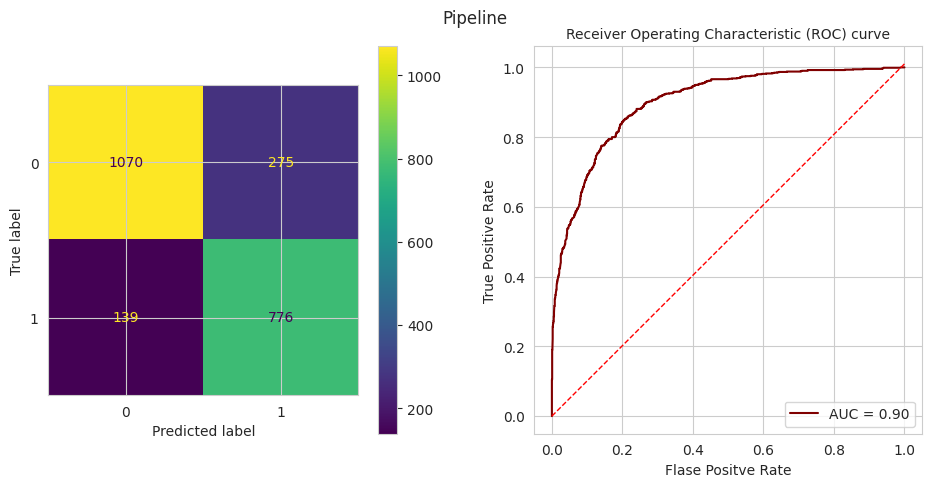

In [ ]:
plot_metrics(model= mymodel.best_estimator_ , X = X_retst, y_target=y_retst)

#### Observations

**For Randomaized search CV model we found best estimator of random forest with upto accuracy of 82% with ROC_AUC score of 90% on test data**

**As it is randomized search of parameters with best settings accuracy and auc score vary at each notebook run**

### GridSearchCV

In [ ]:
# Define hyperparameters for all models

# Random Forest
RF_params = {}
RF_params['n_estimators'] = [5,10,50,100]
RF_params['max_features'] = ['sqrt', 'log2']
RF_params['max_depth'] =  [4,5,6]
RF_params['criterion'] = ['gini', 'entropy']

# Adaboost
AD_params = {}
AD_params['n_estimators'] =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
AD_params['learning_rate'] =  [(0.97 + x / 100) for x in range(0, 8)]
AD_params['algorithm'] =  ['SAMME', 'SAMME.R']

# Logistic Regression
LR_params = {}
LR_params['C'] = np.logspace(-4,4,20)
LR_params['penalty'] = ['l1', 'l2']

# Decission Tree
DT_params = {}
DT_params['max_depth'] =  [1, 2, 3, 10, 20]
DT_params['min_samples_leaf'] = [2, 5, 10, 50, 100]
DT_params['criterion'] = ["gini", "entropy"]
# 50 combinations

# Extra Trees
ET_params = {}
ET_params['max_depth'] = [5,10,25,None]
ET_params['max_features'] = [2,5,10]
ET_params['min_samples_split'] = [2,3,10]
ET_params['min_samples_leaf'] = [1,3,10]
ET_params['bootstrap'] = [False]
ET_params['n_estimators'] = [100,300]
ET_params['criterion'] = ['gini']

# KNeighbors
KN_params = {}
KN_params['n_neighbors'] = [5,7,9,11,13,15]
KN_params['weights'] = ['uniform','distance']
KN_params['metric' ] = ['minkowski','euclidean','manhattan']

# Support Vector Classifier
SVC_params = {}
SVC_params['C'] = [0.1,1, 10, 100]
SVC_params['gamma'] = [1,0.1,0.01,0.001]
SVC_params['kernel'] = ['rbf', 'poly', 'sigmoid']

# Naive Bayes
NB_params = {}
NB_params['alpha'] = [0.01, 0.1, 0.5, 1.0, 10.0]

# Gradient Boosting
GB_params = {}
GB_params['n_estimators'] = [10, 50, 100, 250]
GB_params['max_depth'] = [5, 10, 20]

In [ ]:
# model list and parameters list
model_list = [RF_clf, AD_clf, ET_clf, LR_clf, DT_clf, KN_clf, NB_clf, GB_clf]
param_list = [RF_params, AD_params, ET_params, LR_params, DT_params, KN_params, NB_params, GB_params]

# zip the model and param list dict of dicts
init_models = dict(zip(model_list,param_list))

In [ ]:
from sklearn.model_selection import StratifiedKFold


In [ ]:
%%time
# Grid search CV models

for model, params in tqdm(init_models.items()):

    mymodel = GridSearchCV(estimator=model,
                          param_grid=params,
                          scoring='roc_auc',
                          cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                          n_jobs=-1)
    mymodel.fit(X_retrn, y_retrn)
    best_model = mymodel.best_estimator_
    best_params = mymodel.best_params_
    best_score = mymodel.best_score_
    preds = mymodel.predict(X_retst)
    accuracyGSCV = accuracy_score(y_retst, preds)
    roc_auc = roc_auc_score(y_retst, preds)
    classif_report = classification_report(y_retst, preds)

print(f"Classification report of best {best_model} is: \n", classif_report)
print("******************************************************")
print(f"Accuracy of the best {best_model} is: \n", round(accuracyGSCV,3)*100)
print("******************************************************")
print(f"Auc score of the best {best_model} is: \n", round(roc_auc, 3)*100)
print("******************************************************")
print("Scoring of the best estimator: \n", best_score)
print("******************************************************")
print(f"Best model is {best_model} and best parameters are \n{best_params}")

100%|██████████| 8/8 [21:53<00:00, 164.24s/it]

Classification report of best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.84      1345
           1       0.74      0.84      0.79       915

    accuracy                           0.81      2260
   macro avg       0.81      0.82      0.81      2260
weighted avg       0.82      0.81      0.82      2260

******************************************************
Accuracy of the best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
 81.39999999999999
******************************************************
Auc score of the best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
 81.89999999999999
******************************************************
Scoring of the best estimator: 
 0.9667896170082129
******************************************************
Best model is GradientBoostingClassifier(max_d

#### Observations

**We recieved best scoring on training dataset as it overfits the data but our testing accuracy is low with gradient boosting classifer.**

**With Gradient boosting being the best model, model accuracy on testing data is about 81.3% and ROC-AUC score is about 81.9%**


# **VII. Conclusion**


In our analysis, we have identified key factors that significantly influence a candidate's decision to join a company, shedding light on the complexities of talent acquisition in the IT sector. Here are the main findings:



**Notice Period:** The notice period appears to be the most crucial factor influencing a candidate's decision to join a company. Candidates with shorter notice periods are more likely to proceed with the job offer.


**Salary Hike Expectations:** Candidates are more likely to withdraw from the application process if the offered salary hike is lower than their expectations. It underscores the importance of aligning the compensation package with candidate expectations.


**Line of Business (LOB) and Joining Bonus:** The specific line of business and the presence of a joining bonus also play a significant role in determining a candidate's likelihood of acceptance. HR should take these factors into account when making job offers.



**Our model performed well on the training dataset but faced challenges when applied to the testing data, suggesting some level of overfitting. Despite this, the Gradient Boosting Classifier emerged as the best-performing model, achieving an accuracy of approximately 81.3% on the testing data and an ROC-AUC score of around 81.9%.**



It is important to acknowledge that while the model provides valuable insights and predictive capabilities, there may be other unmeasurable factors, such as personal circumstances, individual career goals, or company reputation, that also influence a candidate's decision. HR teams should consider these findings as valuable guidelines, rather than definitive rules, when making hiring decisions.


In conclusion, by leveraging these insights and the predictive capabilities of the Gradient Boosting model, HR and talent acquisition teams can make more informed decisions, optimize the recruitment process, and enhance their ability to attract and retain top talent in the highly competitive IT sector. It's crucial to continuously refine and update the model as more data becomes available to improve its accuracy and applicability.

                                                
                                                
                                              Summary of model performances:

|       Model name    | ROC-AUC | Accuracy |
|---------------------|---------|----------|
|Logistics            |   70%   |   72%    |
|RFC                  |   86%   |   86%    |
|RFC(RandomizedSearch)|upto94%  |   86.7%  |
|GBT(Gridsearch)      |   86.1% |   85.7%  |